Welcome to Mickey McDonell's Portland, OR vs. Sacramento, CA Compared and Contrasted Jupyter Notebook.
We will be looking at these two cities and trying to learn as much as we can using machine learning and data analysis.

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium
geolocator = Nominatim(user_agent="portland_sacramento")
import math
import numpy as np

In [2]:
pd_locations = []
pd_loc = []
pd_long = []
pd_lat = []

Here we are creating a list of Portland neighborhood names to be used in the geopy nominatim service to locate the coordinates of each neighborhood.  

In [3]:
i = 0
pd_neighborhoods = ['Southwest Hills, Portland, Oregon',
'Reed, Portland, Oregon',
'Saint Johns, Portland, Oregon',
'Downtown, Portland, Oregon',
'Goose Hollow, Portland, Oregon',
'Mt. Scott-Arleta, Portland, Oregon',
'Pearl District, Portland, Oregon',
'Northwest District, Portland, Oregon',
'Vernon, Portland, Oregon',
'Rose City Park, Portland, Oregon',
'Buckman, Portland, Oregon',
'Hazelwood, Portland, Oregon',
'Arbor Lodge, Portland, Oregon',
'Multnomah, Portland, Oregon',
'Parkrose Heights, Portland, Oregon',
'Bridlemile, Portland, Oregon',
'Boise, Portland, Oregon',
'Hillsdale, Portland, Oregon',
'Lents, Portland, Oregon',                    
'Montavilla, Portland, Oregon',
'Cully, Portland, Oregon',
'Brentwood/Darlington, Portland, Oregon',
'Richmond, Portland, Oregon',
'Portsmouth, Portland, Oregon',
'Mt Tabor, Portland, Oregon',
'Eliot, Portland, Oregon',
'Grant Park, Portland, Oregon',
'Brooklyn, Portland, Oregon',
'Hosford-Abernethy, Portland, Oregon',
'Lloyd District, Portland, Oregon']
for hood in pd_neighborhoods:
    pd_locations.append(geolocator.geocode(hood))
    print (pd_locations[i]._address)
    i = i + 1

Southwest Hills, Portland, Metro, Oregon, 97201, United States
Reed, Portland, Metro, Oregon, 97202, United States
Saint Johns, Portland, Metro, Oregon, 97203, United States
Downtown, Portland, Metro, Multnomah, Oregon, United States
Goose Hollow, Portland, Metro, Oregon, 97205, United States
Mount Scott-Arleta, Portland, Metro, Oregon, 97206, United States
Pearl District, Portland, Metro, Oregon, 97209, United States
Northwest District, Portland, Metro, Oregon, United States
Vernon, Portland, Metro, Oregon, 97211, United States
Rose City Park, Portland, Metro, Oregon, 97213, United States
Buckman, Portland, Metro, Oregon, 97214, United States
Hazelwood, Portland, Metro, Multnomah, Oregon, 97216, United States
Arbor Lodge, Portland, Metro, Oregon, 97217, United States
Multnomah, Portland, Metro, Oregon, 97219, United States
Parkrose Heights, Portland, Metro, Multnomah, Oregon, 97220, United States
Bridlemile, Portland, Metro, Oregon, 97221, United States
Boise, Portland, Metro, Oregon,

We don't need the city, state, country and zip code so we'll take them out leaving just the neighborhood names.

In [4]:
for l in pd_locations:
    pd_loc.append(l._address.split(','))

In [5]:
i = 0
for k in pd_loc:
        pd_long.append(pd_locations[i].longitude)
        pd_lat.append(pd_locations[i].latitude)
        i = i+1

In [6]:
pd_locName = []
for n in pd_loc:
    pd_locName.append(n[0])

Now we will provide each neighborhood with its population data.
Source: https://www.portlandoregon.gov/civic/56897
Note that we are using the 2010 data so that it will match with Sacramento's 2010 data as well.
We will also rearrange the list to be alphabetized. 

In [7]:
pd_populations = [8389, 4399, 12207, 12801, 6507, 
               7397, 5997, 13399, 2585, 8982, 8472, 23462, 
               6153, 7409, 6363, 5481, 3311, 
               7540, 20465, 16287, 13209, 12994, 11607, 9789, 10162, 3611, 3937, 3485, 7336, 1142]
pd_d = {'Name': pd_locName, 'Latitude': pd_lat, 'Longitude': pd_long, }
pd_df = pd.DataFrame(data = pd_d)
pd_df['Population'] = pd_populations
pd_df = pd_df.sort_values(by = 'Name').reset_index(drop = True)
pd_df.head(30)

,Name,Latitude,Longitude,Population
0,Arbor Lodge,45.571794,-122.690152,6153
1,Boise,45.550159,-122.671878,3311
2,Brentwood-Darlington,45.468707,-122.597633,12994
3,Bridlemile,45.492559,-122.726693,5481
4,Brooklyn,45.494819,-122.651552,3485
5,Buckman,45.517381,-122.651954,8472
6,Cully,45.561546,-122.602080,13209
7,Downtown,45.515274,-122.680025,12801
8,Eliot,45.541219,-122.668437,3611
9,Goose Hollow,45.517749,-122.692819,6507


Now to do the same thing with Sacramento. When trying to lookup each neighborhood by name, geopy did not find the correct location, so for some neighborhoods I have used coordinates provided by Google Maps instead.

In [8]:
i = 0
sa_postalcodes = ['Ben Ali, Sacramento, California',
    'Boulevard Park, Sacramento, California',
    'Colonial Heights, Sacramento, California',
    'Curtis Park, Sacramento, California',
    'Del Paso Heights, Sacramento, California',
    'Downtown Sacramento',
    '38.5677, -121.4462', # East Sacramento
    'Elmhurst, Sacramento, California',
    'Gardenland, Sacramento, California',
    'Land Park, Sacramento, California',
    'Natomas, Sacramento, California',
    'Oak Park, Sacramento, California',
    'Robla, Sacramento, California',
    'Southside Park, Sacramento, California',
    'Tahoe Park, Sacramento, California',
    'Meadowview, Sacramento, California',
    'Pocket, Sacramento, California',
    'Greenhaven, Sacramento, California',
    'Avondale, Sacramento, California',
    'Fruitridge Manor, Sacramento, California',
    '38.5832, -121.4263', #River Park
    "38.6477, -121.4615", # Glendwood Meadows
    'Northgate, Sacramento, California',
    'Gateway West, Sacramento, California',
    'Sundance Lake, Sacramento, California',
    'Westlake, Sacramento, California',
    'Natomas Crossing, Sacramento, California',
    'Hagginwood, Sacramento, California',
    'Newton Booth, Sacramento, California',
    'River Gardens, Sacramento, California']
sa_locations = []
sa_loc = []
sa_long = []
sa_lat = []
for postalcode in sa_postalcodes:
    sa_locations.append(geolocator.geocode(postalcode))
    print (sa_locations[i]._address)
    i = i + 1

Ben Ali, Sacramento, Sacramento County, California, 95815, United States
The Park, Sacramento, Sacramento County, California, United States
Colonial Heights Community Library, 21st Avenue, Sacramento, Sacramento County, California, 95820, United States
Curtis Park, Sacramento, Sacramento County, California, United States
Del Paso Heights, Sacramento, Sacramento County, California, 95838, United States
Downtown, 7th Street, Sacramento, Sacramento County, California, 95814, United States
4549, J Street, Sacramento, Sacramento County, California, 95819, United States
Elmhurst Circle, Sacramento, Sacramento County, California, 95819-6055, United States
Gardenland, Sacramento, Sacramento County, California, 94834, United States
Land Park, Sacramento, Sacramento County, California, 95818, United States
South Natomas, Sacramento, Sacramento County, California, 94834, United States
Oak Park, Sacramento, Sacramento County, California, 95817, United States
Robla, Sacramento, Sacramento County, C

In [9]:
for l in sa_locations:
    sa_loc.append(l._address.split(','))

In [10]:
i = 0
for k in sa_loc:
    sa_lat.append(sa_locations[i].latitude)
    sa_long.append(sa_locations[i].longitude)
    i = i+1

In [11]:
sa_locName = []
for n in sa_loc:
    sa_locName.append(n[0])

In [12]:
sa_d = {'Name': sa_locName, 'Latitude': sa_lat, 'Longitude': sa_long}
sa_df = pd.DataFrame(data = sa_d)

Some neighborhoods did not return a usable name, so I have gone and renamed them to be their correct neighborhood name.

In [13]:
sa_df.replace({'Name': 'E'}, 'East Sacramento', inplace = True)
sa_df.replace({'Name': 'Colonial Heights Community Library'}, 'Colonial Heights', inplace = True)
sa_df.replace({'Name': 'Elmhurst Circle'}, 'Elmhurst', inplace = True)
sa_df.at[1, 'Name']= 'Boulevard Park' #rename the park to boulevard park
sa_df.at[6, 'Name']= 'East Sacramento' #rename 4549 to East Sacramento
sa_df.at[18, 'Name']= 'Avondale' #rename avondale avenue to avondale
sa_df.at[20, 'Name']= 'River Park' #rename American River Bike Trail to river park
sa_df.at[21, 'Name']= 'Glenwood Meadows' #rename 300 to glenwood meadows
sa_df.at[28, 'Name'] = 'Midtown' #rename Merryhill School Midtown, to Midtown
sa_populations = [1359, 2891, 1951, 5355, 4364, 6666, 16636, 2012, 3821,
24565, 25262, 14284, 8182, 2318, 8398, 26629, 1105, 9028, 4485,
              4565, 3558, 4894, 4061, 7864, 4888, 3311, 3165, 9971, 6361, 2118]
sa_df['Population'] = sa_populations
sa_df = sa_df.sort_values(by = 'Name').reset_index(drop = True)
sa_df.head(30)

,Name,Latitude,Longitude,Population
0,Avondale,38.597414,-121.397586,4485
1,Ben Ali,38.615511,-121.426040,1359
2,Boulevard Park,38.532892,-121.495858,2891
3,Colonial Heights,38.532407,-121.445509,1951
4,Curtis Park,38.547359,-121.480280,5355
5,Del Paso Heights,38.636015,-121.420231,4364
6,Downtown,38.574329,-121.501233,6666
7,East Sacramento,38.567799,-121.446263,16636
8,Elmhurst,38.562614,-121.415032,2012
9,Fruitridge Manor,38.524907,-121.442176,4565


In [14]:
import folium

We will be displaying 2 folium maps in one cell in the next frame, please ignore the warning message if you see it.

In [102]:
map_portland = folium.Map(location = [45.5051, -122.675], zoom_start = 10)

for lats, lngs, names, pops in zip(pd_df['Latitude'], pd_df['Longitude'], pd_df['Name'], pd_df['Population']):
    label = '{} \n Pop:{:,}'.format(names, pops)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lats, lngs],
    raidus = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html = False).add_to(map_portland)

map_sacramento = folium.Map(location = [38.5816, -121.4944], zoom_start = 10)

for lats, lngs, names, pops in zip(sa_df['Latitude'], sa_df['Longitude'], sa_df['Name'], sa_df['Population']):
    label = '{} \n Pop:{:,}'.format(names, pops)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lats, lngs],
    raidus = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html = False).add_to(map_sacramento)
type(map_portland)


from IPython.core.display import display, HTML

htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 50%; margin: 0 auto; border: 2px solid black"></iframe>'
           .format(map_portland.get_root().render().replace('"', '&quot;'),500,500,
                   map_sacramento.get_root().render().replace('"', '&quot;'),500,500))
display(htmlmap)

E:\Junk\Anaconda\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


What I want to do  now is to save the coordinates for the downtown neighborhood for both Portland and Sacramento and then compare each neighborhood coordination to the downtown's. This will be done using Euclidean distance and by converting the longtidue and latitude measurements into miles. Because we are roughly 40 units in latitude from the equator we will multiply 69 to the latitude and we will be multiplying 53 to the longitude. These values should give us a good estimate as to the correct distance in miles. You can use this site to double check the results: https://www.nhc.noaa.gov/gccalc.shtml

In [16]:
pd_downtown_coord = []
pd_downtown_coord.append(pd_df.iloc[7]['Latitude'])
pd_downtown_coord.append(pd_df.iloc[7]['Longitude'])
pd_downtown_distance = []

for a in pd_df.iterrows():
    pd_downtown_distance.append(round(
    math.sqrt((69*(pd_downtown_coord[0]-a[1]['Latitude']))**2+(53*(pd_downtown_coord[1]-a[1]['Longitude']))**2),2))
pd_df['Distance From Downtown (mi)'] = pd_downtown_distance
pd_df.head(30)

,Name,Latitude,Longitude,Population,Distance From Downtown (mi)
0,Arbor Lodge,45.571794,-122.690152,6153,3.94
1,Boise,45.550159,-122.671878,3311,2.45
2,Brentwood-Darlington,45.468707,-122.597633,12994,5.42
3,Bridlemile,45.492559,-122.726693,5481,2.93
4,Brooklyn,45.494819,-122.651552,3485,2.07
5,Buckman,45.517381,-122.651954,8472,1.49
6,Cully,45.561546,-122.602080,13209,5.22
7,Downtown,45.515274,-122.680025,12801,0.00
8,Eliot,45.541219,-122.668437,3611,1.89
9,Goose Hollow,45.517749,-122.692819,6507,0.70


In [17]:
sa_downtown_coord = []
sa_downtown_coord.append(sa_df.iloc[6]['Latitude'])
sa_downtown_coord.append(sa_df.iloc[6]['Longitude'])
sa_downtown_distance = []

for a in sa_df.iterrows():
    sa_downtown_distance.append(round(
    math.sqrt((69*(sa_downtown_coord[0]-a[1]['Latitude']))**2+(53*(sa_downtown_coord[1]-a[1]['Longitude']))**2),2))
sa_df['Distance From Downtown (mi)'] = sa_downtown_distance
sa_df.head(30)

,Name,Latitude,Longitude,Population,Distance From Downtown (mi)
0,Avondale,38.597414,-121.397586,4485,5.72
1,Ben Ali,38.615511,-121.426040,1359,4.89
2,Boulevard Park,38.532892,-121.495858,2891,2.87
3,Colonial Heights,38.532407,-121.445509,1951,4.13
4,Curtis Park,38.547359,-121.480280,5355,2.17
5,Del Paso Heights,38.636015,-121.420231,4364,6.05
6,Downtown,38.574329,-121.501233,6666,0.00
7,East Sacramento,38.567799,-121.446263,16636,2.95
8,Elmhurst,38.562614,-121.415032,2012,4.64
9,Fruitridge Manor,38.524907,-121.442176,4565,4.63


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

Now we will do a simple linear regression using the distance from downtown we just calculated to try to predict the population of the neighborhood.

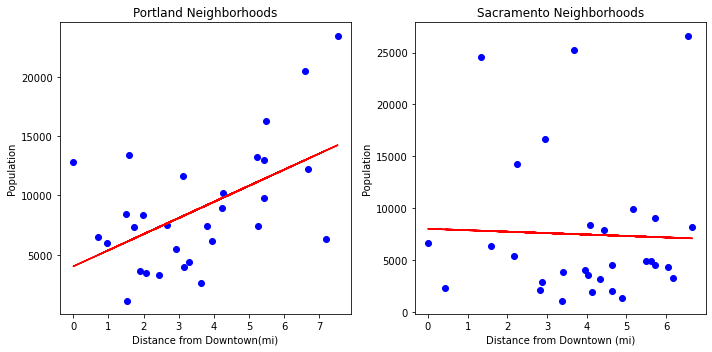

In [19]:
plt.rcParams["figure.figsize"]=10,5
plt.subplot(1,2,1)
plt.scatter(pd_df['Distance From Downtown (mi)'], pd_df['Population'],  color='blue')
plt.xlabel("Distance from Downtown(mi)")
plt.ylabel("Population")
plt.title("Portland Neighborhoods")

regr = linear_model.LinearRegression()
x = np.asanyarray(pd_df[['Distance From Downtown (mi)']])
y = np.asanyarray(pd_df[['Population']])
regr.fit (x, y)
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.subplot(1,2,2)
plt.scatter(sa_df['Distance From Downtown (mi)'], sa_df['Population'],  color='blue')
plt.xlabel("Distance from Downtown (mi)")
plt.ylabel("Population")
plt.title("Sacramento Neighborhoods")

regr = linear_model.LinearRegression()
x = np.asanyarray(sa_df[['Distance From Downtown (mi)']])
y = np.asanyarray(sa_df[['Population']])
regr.fit (x, y)
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.tight_layout()
plt.show()

Our Portland model seems to have a positive slope, while Sacramento is nearly flat, let's look at how these models performed.

In [20]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [60]:
pd_msk = np.random.rand(len(pd_df)) < 0.8
pd_train = pd_df[pd_msk]
pd_test = pd_df[~pd_msk]

regr = linear_model.LinearRegression()
pd_train_x = np.asanyarray(pd_train[['Distance From Downtown (mi)']])
pd_train_y = np.asanyarray(pd_train[['Population']])
regr.fit (pd_train_x, pd_train_y)

pd_test_x = np.asanyarray(pd_test[['Distance From Downtown (mi)']])
pd_test_y = np.asanyarray(pd_test[['Population']])
pd_test_y_ = regr.predict(pd_test_x)

print("Portland's Mean absolute error: %.2f" % np.mean(np.absolute(pd_test_y_ - pd_test_y)))
print("Portland's Residual sum of squares (MSE): %.2f" % np.mean((pd_test_y_ - pd_test_y) ** 2))
print("Portland's R2-score: %.2f" % r2_score(pd_test_y , pd_test_y_), '\n')

sa_msk = np.random.rand(len(sa_df)) < 0.8
sa_train = sa_df[sa_msk]
sa_test = sa_df[~sa_msk]
regr = linear_model.LinearRegression()
sa_train_x = np.asanyarray(sa_train[['Distance From Downtown (mi)']])
sa_train_y = np.asanyarray(sa_train[['Population']])
regr.fit (sa_train_x, sa_train_y)

sa_test_x = np.asanyarray(sa_test[['Distance From Downtown (mi)']])
sa_test_y = np.asanyarray(sa_test[['Population']])
sa_test_y_ = regr.predict(sa_test_x)

print("Sacramento's Mean absolute error: %.2f" % np.mean(np.absolute(sa_test_y_ - sa_test_y)))
print("Sacramento's Residual sum of squares (MSE): %.2f" % np.mean((sa_test_y_ - sa_test_y) ** 2))
print("Sacramento's R2-score: %.2f" % r2_score(sa_test_y , sa_test_y_))

Portland's Mean absolute error: 2363.02
Portland's Residual sum of squares (MSE): 7282051.26
Portland's R2-score: 0.36 

Sacramento's Mean absolute error: 5713.31
Sacramento's Residual sum of squares (MSE): 61796224.96
Sacramento's R2-score: -0.04


I've noticed each time I run these cells the outputs change because the random sample of test/train change with each run. Ffrom what I've noticed in general, the Portland's R squared score tends to be higher than Sacramento's. I think this makes sense because the linear regression line seems to fit the data better in the Portland graph than the Sacramento's. Sacramento's MSE also tends to be higher (but not all the time) which means the distance of the points squared from the line is greater than Portlands's. There are 3 points on the top of Sacramento's graph hovering around 25,000 that inflate this number greatly.

In [22]:
# @hidden_cell
CLIENT_ID = '5NBOGS2ZSSIXKDGSPLFQKOEBGNID3ACVH32QT2O3HRTUS4XF' # your Foursquare ID
CLIENT_SECRET = 'IVGBBNLGO35GB1C2MWOILPH2S4R1J3PN50U0VQNLMONUUJKZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [23]:
import requests

Now let's get into looking at the venues in each neighborhood with Foursquare's API. We are setting our radius to 5,000 meters and the upper limit of venues to retrieve is set to 100.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100
    venues_list=[]
    for venue_name, lat_coord, lng_coord in zip(names, latitudes, longitudes):
        print(venue_name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat_coord, 
            lng_coord, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            venue_name, 
            lat_coord, 
            lng_coord, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
portland_venues = pd.DataFrame()
portland_venues = getNearbyVenues(names = pd_df['Name'], 
                                  latitudes = pd_df['Latitude'], longitudes = pd_df['Longitude'])

Arbor Lodge
Boise
Brentwood-Darlington
Bridlemile
Brooklyn
Buckman
Cully
Downtown
Eliot
Goose Hollow
Grant Park
Hazelwood
Hillsdale
Hosford-Abernethy
Lents
Lloyd District
Montavilla
Mount Scott-Arleta
Mount Tabor
Multnomah
Northwest District
Parkrose Heights
Pearl District
Portsmouth
Reed
Richmond
Rose City Park
Saint Johns
Southwest Hills
Vernon


In [26]:
sacramento_venues = pd.DataFrame()
sacramento_venues = getNearbyVenues(names = sa_df['Name'], 
                                    latitudes = sa_df['Latitude'], longitudes = sa_df['Longitude'])

Avondale
Ben Ali
Boulevard Park
Colonial Heights
Curtis Park
Del Paso Heights
Downtown
East Sacramento
Elmhurst
Fruitridge Manor
Gardenland
Gateway West
Glenwood Meadows
Greenhaven Oaks
Hagginwood
Land Park
Little Pocket
Meadowview
Midtown
Natomas Crossing
Northgate
Oak Park
River Gardens
River Park
Robla
South Natomas
Southside Park
Sundance Lake
Tahoe Park
Westlake


In [27]:
print("The number of venues found in the Portland neighborhoods list is: ", portland_venues.shape[0], '\n',
     "The number of venues found in the Sacramento neighborhoods list is: ", sacramento_venues.shape[0])

The number of venues found in the Portland neighborhoods list is:  820 
 The number of venues found in the Sacramento neighborhoods list is:  431


We definitely got a lot more venues in Portland than Sacramento (nearly double).

What I would like to do now is to use the venue data to perform some logistic regression to try to predict if a neighborhood has a coffee shop of some kind in it. I will be looking through the venue category tags for "coffee shop," "cafe," and "tea room" to determine if the neighborhood in question has some type of cafe. 
First, let's label each neighborhood with a column saying whether it has or doesn't have a cafe (1 means yes, 0 means no). 

In [28]:
temp_list = portland_venues.loc[(portland_venues['Venue Category'] == 'Coffee Shop') | (portland_venues['Venue Category'] == 'Tea Room') | (portland_venues['Venue Category'] == 'Café')]
temp_list_grouped = temp_list['Neighborhood'].unique()
temp_list_grouped

array(['Arbor Lodge', 'Boise', 'Brooklyn', 'Buckman', 'Downtown',
       'Goose Hollow', 'Hillsdale', 'Hosford-Abernethy', 'Lents',
       'Lloyd District', 'Montavilla', 'Mount Scott-Arleta',
       'Mount Tabor', 'Multnomah', 'Northwest District', 'Pearl District',
       'Richmond', 'Rose City Park', 'Vernon'], dtype=object)

In [29]:
new_column = []
for u in pd_df['Name']:
    if(u in temp_list_grouped):
        new_column.append(1)
    else:
        new_column.append(0)
#print(new_column)
pd_df_nc = pd_df
pd_df_nc['Has Cafe'] = new_column
pd_df_nc.head()

,Name,Latitude,Longitude,Population,Distance From Downtown (mi),Has Cafe
0,Arbor Lodge,45.571794,-122.690152,6153,3.94,1
1,Boise,45.550159,-122.671878,3311,2.45,1
2,Brentwood-Darlington,45.468707,-122.597633,12994,5.42,0
3,Bridlemile,45.492559,-122.726693,5481,2.93,0
4,Brooklyn,45.494819,-122.651552,3485,2.07,1


In [30]:
pd_venueCount = portland_venues.groupby('Neighborhood').count()
pd_venueCount = pd_venueCount.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 
                                            'Venue Longitude', 'Venue Category'])
pd_venueCount = pd_venueCount.rename(columns={'Venue': 'Venues'})
pd_venueCount = pd_venueCount.reset_index()
pd_df_nc['Venue Count'] = pd_venueCount['Venues']

With that done, we can now start the logistic regression. I am predicting whether or not there is a cafe in a given neighborhood based on that neighborhood's population and venue count. So now, let's split our data into training and testing sets and find out the results.

In [31]:
from sklearn import preprocessing
X_log = np.asarray(pd_df_nc[['Population', 'Venue Count']])
y_log = np.asarray(pd_df_nc['Has Cafe'])
X_log = preprocessing.StandardScaler().fit(X_log).transform(X_log)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_log, y_log, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 2) (24,)
Test set: (6, 2) (6,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [34]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 1], dtype=int64)

In [35]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.4974322 , 0.5025678 ],
       [0.50223053, 0.49776947],
       [0.50139248, 0.49860752],
       [0.46382588, 0.53617412],
       [0.47089202, 0.52910798],
       [0.49501614, 0.50498386]])

We have 6 neighborhoods in our testing set and 24 in our training set. Depending on when you run this, the results of the jaccard score and the confusion matrix may very. For me I found I got .6 repeating for Portland's jaccard score and .25 for Sacramento's. And the confusion matrix correctly predicted 5 out of 6 for Portland and 3 out of 6 for Sacramento.

In [36]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.6666666666666666

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[3 0]
 [1 2]]


Confusion matrix, without normalization
[[3 0]
 [1 2]]


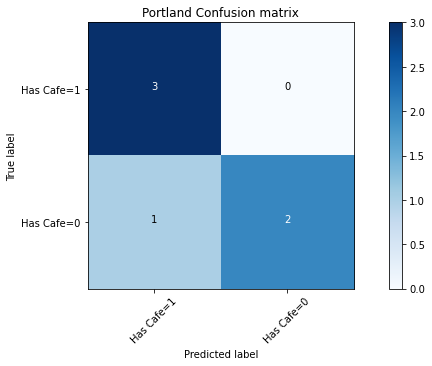

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Has Cafe=1','Has Cafe=0'],normalize= False,  title='Portland Confusion matrix')

In [39]:
temp_list = sacramento_venues.loc[(sacramento_venues['Venue Category'] == 'Coffee Shop') | (sacramento_venues['Venue Category'] == 'Café')]
temp_list_grouped = temp_list['Neighborhood'].unique()
temp_list_grouped

array(['Avondale', 'Boulevard Park', 'Downtown', 'East Sacramento',
       'Greenhaven Oaks', 'Natomas Crossing', 'Oak Park',
       'Southside Park', 'Tahoe Park'], dtype=object)

In [40]:
new_column = []
for u in sa_df['Name']:
    if(u in temp_list_grouped):
        new_column.append(1)
    else:
        new_column.append(0)
#print(new_column)
sa_df_nc = sa_df
sa_df_nc['Has Cafe'] = new_column
sa_df_nc.head()

,Name,Latitude,Longitude,Population,Distance From Downtown (mi),Has Cafe
0,Avondale,38.597414,-121.397586,4485,5.72,1
1,Ben Ali,38.615511,-121.426040,1359,4.89,0
2,Boulevard Park,38.532892,-121.495858,2891,2.87,1
3,Colonial Heights,38.532407,-121.445509,1951,4.13,0
4,Curtis Park,38.547359,-121.480280,5355,2.17,0


In [41]:
sa_venueCount = sacramento_venues.groupby('Neighborhood').count()
sa_venueCount = sa_venueCount.drop(columns=['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 
                                            'Venue Longitude', 'Venue Category'])
sa_venueCount = sa_venueCount.rename(columns={'Venue': 'Venues'})
sa_venueCount = sa_venueCount.reset_index()
sa_df_nc['Venue Count'] = sa_venueCount['Venues']

In [42]:
X_log = np.asarray(sa_df_nc[['Population', 'Venue Count']])
y_log = np.asarray(sa_df_nc['Has Cafe'])
X_log = preprocessing.StandardScaler().fit(X_log).transform(X_log)

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X_log, y_log, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 2) (24,)
Test set: (6, 2) (6,)


In [44]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5 , 0.5 ],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.49, 0.51],
       [0.5 , 0.5 ]])

In [46]:
jaccard_score(y_test, yhat,pos_label=0)

0.25

In [47]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2 0]
 [3 1]]


Confusion matrix, without normalization
[[2 0]
 [3 1]]


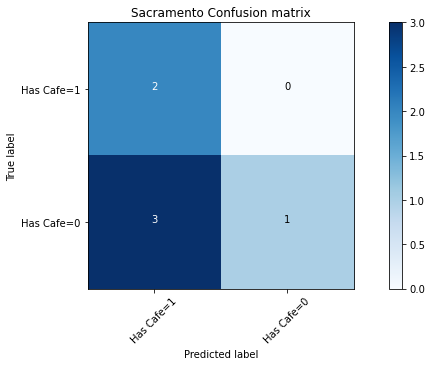

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Has Cafe=1','Has Cafe=0'],normalize= False,  title='Sacramento Confusion matrix')

Let's look a bit more closely at the venues in each neighborhood.

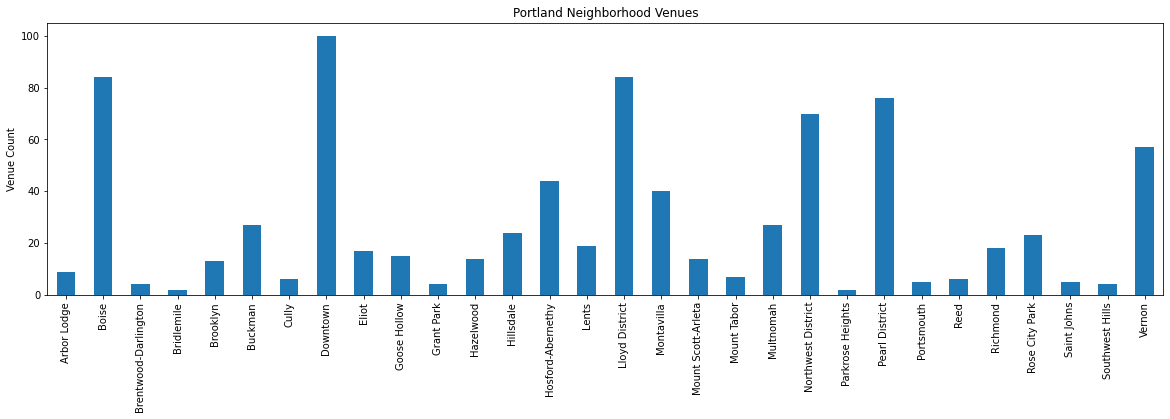

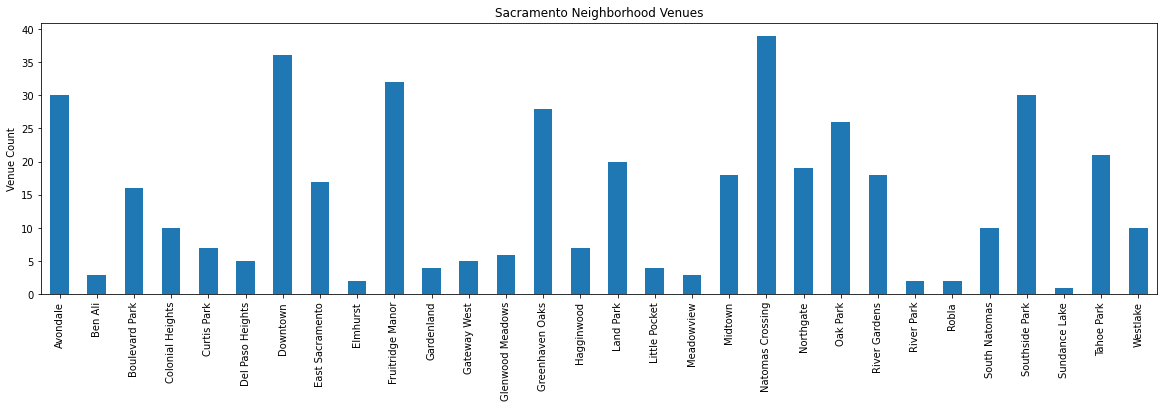

In [49]:
plt.rcParams["figure.figsize"]=20,5
ax = pd_venueCount.plot.bar(rot=0)
plt.title('Portland Neighborhood Venues')
plt.xticks(rotation='vertical')
ax.set_ylabel('Venue Count')
ax.set_xticklabels(pd_venueCount['Neighborhood'])
ax.get_legend().remove()

plt.rcParams["figure.figsize"]=20,5
ax = sa_venueCount.plot.bar(rot=0)
plt.title('Sacramento Neighborhood Venues')
plt.xticks(rotation='vertical')
ax.set_ylabel('Venue Count')
ax.set_xticklabels(sa_venueCount['Neighborhood'])
ax.get_legend().remove()

We can do another simple linear regression with distance from downtown being the independent variable, but with venue count as the variable we are trying to predict.

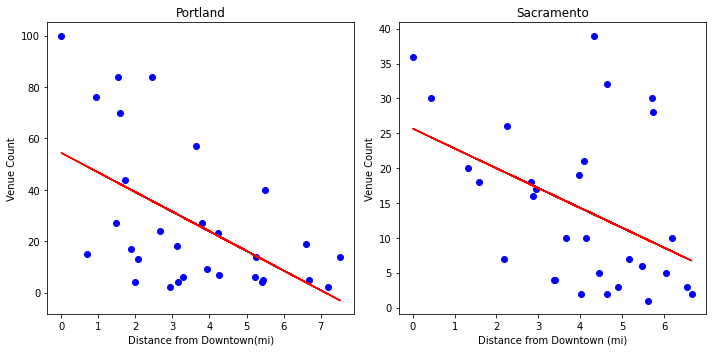

In [50]:
plt.rcParams["figure.figsize"]=10,5
plt.subplot(1,2,1)
plt.scatter(pd_df['Distance From Downtown (mi)'], pd_venueCount['Venues'],  color='blue')
plt.xlabel("Distance from Downtown(mi)")
plt.ylabel("Venue Count")
plt.title("Portland")

regr = linear_model.LinearRegression()
x = np.asanyarray(pd_df[['Distance From Downtown (mi)']])
y = np.asanyarray(pd_venueCount[['Venues']])
regr.fit (x, y)
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')

plt.subplot(1,2,2)
plt.scatter(sa_df['Distance From Downtown (mi)'], sa_venueCount['Venues'],  color='blue')
plt.xlabel("Distance from Downtown (mi)")
plt.ylabel("Venue Count")
plt.title("Sacramento")

regr = linear_model.LinearRegression()
x = np.asanyarray(sa_df[['Distance From Downtown (mi)']])
y = np.asanyarray(sa_venueCount[['Venues']])
regr.fit (x, y)
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.tight_layout()
plt.show()

In [54]:
pd_venueCount['Distance From Downtown (mi)'] = pd_df['Distance From Downtown (mi)']
sa_venueCount['Distance From Downtown (mi)'] = sa_df['Distance From Downtown (mi)']

pd_msk = np.random.rand(len(pd_venueCount)) < 0.8
pd_train = pd_venueCount[pd_msk]
pd_test = pd_venueCount[~pd_msk]

regr = linear_model.LinearRegression()
pd_train_x = np.asanyarray(pd_train[['Distance From Downtown (mi)']])
pd_train_y = np.asanyarray(pd_train[['Venues']])
regr.fit (pd_train_x, pd_train_y)

pd_test_x = np.asanyarray(pd_test[['Distance From Downtown (mi)']])
pd_test_y = np.asanyarray(pd_test[['Venues']])
pd_test_y_ = regr.predict(pd_test_x)

print("Portland's Mean absolute error: %.2f" % np.mean(np.absolute(pd_test_y_ - pd_test_y)))
print("Portland's Residual sum of squares (MSE): %.2f" % np.mean((pd_test_y_ - pd_test_y) ** 2))
print("Portland's R2-score: %.2f" % r2_score(pd_test_y , pd_test_y_), '\n')

sa_msk = np.random.rand(len(sa_venueCount)) < 0.8
sa_train = sa_venueCount[sa_msk]
sa_test = sa_venueCount[~sa_msk]
regr = linear_model.LinearRegression()
sa_train_x = np.asanyarray(sa_train[['Distance From Downtown (mi)']])
sa_train_y = np.asanyarray(sa_train[['Venues']])
regr.fit (sa_train_x, sa_train_y)

sa_test_x = np.asanyarray(sa_test[['Distance From Downtown (mi)']])
sa_test_y = np.asanyarray(sa_test[['Venues']])
sa_test_y_ = regr.predict(sa_test_x)

print("Sacramento's Mean absolute error: %.2f" % np.mean(np.absolute(sa_test_y_ - sa_test_y)))
print("Sacramento's Residual sum of squares (MSE): %.2f" % np.mean((sa_test_y_ - sa_test_y) ** 2))
print("Sacramento's R2-score: %.2f" % r2_score(sa_test_y , sa_test_y_))

Portland's Mean absolute error: 18.93
Portland's Residual sum of squares (MSE): 544.58
Portland's R2-score: 0.18 

Sacramento's Mean absolute error: 8.44
Sacramento's Residual sum of squares (MSE): 103.66
Sacramento's R2-score: -0.41


It seems that in both cases, the further we are from downtown, the less venues there are to choose from.  As for the scores, Portland's MSE is consistantly higher than Sacramento's which makes sense because there are substantially more venues found in Portland's data which creates more error.

Now let's run some K-Means clustering tests to learn more about the cities. First we will cluster the neighborhoods by looking at the venue categories and grouping similar neighborhoods based on this information. We want to get a percentage of each type of venue compared to all the venues in that neighborhood so first we use one-hot encoding.

In [55]:
portland_onehot = pd.get_dummies(portland_venues[['Venue Category']], prefix="", prefix_sep="")

portland_onehot['Neighborhood'] = portland_venues['Neighborhood'] 

fixed_columns = [portland_onehot.columns[-1]] + list(portland_onehot.columns[:-1])
portland_onehot = portland_onehot[fixed_columns]

portland_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
portland_grouped = portland_onehot.groupby('Neighborhood').mean().reset_index()
portland_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,American Restaurant,Amphitheater,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tunnel,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Arbor Lodge,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Boise,0.00,0.000000,0.000000,0.011905,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.023810,0.011905,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.011905
2,Brentwood-Darlington,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Bridlemile,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Brooklyn,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Buckman,0.00,0.000000,0.000000,0.037037,0.000000,0.037037,0.00,0.000000,0.000000,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.00,0.037037,0.000000,0.000000,0.000000
6,Cully,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Downtown,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.010000,0.010000,...,0.000000,0.020000,0.000000,0.000000,0.010000,0.01,0.010000,0.000000,0.010000,0.010000
8,Eliot,0.00,0.058824,0.000000,0.058824,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
9,Goose Hollow,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.066667,0.133333,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


Now let's order the venue types in descending order to get the top 10 venue categories in each neighborhood. For neighborhoods with less than 10 venues returned 'NaN' will be printed in the respective columns.

In [57]:
def return_most_common_venues(row, num_top_venues):
    my_index = []
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)[0:num_top_venues]
    for index, value in row_categories_sorted.items():
        if(value == 0):
            my_index.append('NaN')
        else:
            my_index.append(index)
    row_categories_sorted = row_categories_sorted.reindex(my_index)
    return row_categories_sorted.index.values

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = portland_grouped['Neighborhood']

for ind in np.arange(portland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(portland_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbor Lodge,Convenience Store,Bus Stop,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Thai Restaurant,Marijuana Dispensary,NaN,NaN
1,Boise,Food Truck,Coffee Shop,Pizza Place,Cocktail Bar,Pet Store,Gift Shop,Grocery Store,Tea Room,Flower Shop,Mexican Restaurant
2,Brentwood-Darlington,Deli / Bodega,Bus Stop,Dog Run,Park,NaN,NaN,NaN,NaN,NaN,NaN
3,Bridlemile,Tennis Court,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brooklyn,Bar,Light Rail Station,Arts & Crafts Store,Marijuana Dispensary,Park,Soccer Stadium,Pizza Place,Furniture / Home Store,Café,Bus Stop
5,Buckman,Coffee Shop,Bar,Brewery,Russian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Park,Mexican Restaurant,Martial Arts School,Beer Store
6,Cully,Marijuana Dispensary,Taco Place,Comedy Club,Mexican Restaurant,Gas Station,Farm,NaN,NaN,NaN,NaN
7,Downtown,Coffee Shop,Hotel,Park,Café,Performing Arts Venue,Pizza Place,Food Truck,Steakhouse,French Restaurant,Cocktail Bar
8,Eliot,Brewery,Park,Intersection,Lounge,Bus Stop,Mexican Restaurant,Tapas Restaurant,Bookstore,Gym / Fitness Center,Gym
9,Goose Hollow,Vegetarian / Vegan Restaurant,Pub,Pizza Place,Thai Restaurant,Indian Restaurant,Cooking School,Soccer Stadium,Sushi Restaurant,Tunnel,Gym / Fitness Center


In [61]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Now we will use the elbow method to determine the optimal value for K. This graph changes upon run time but I've found 6 is usually a good place where the graph beings to level out. Albeit the graph is a little wonky looking each time.

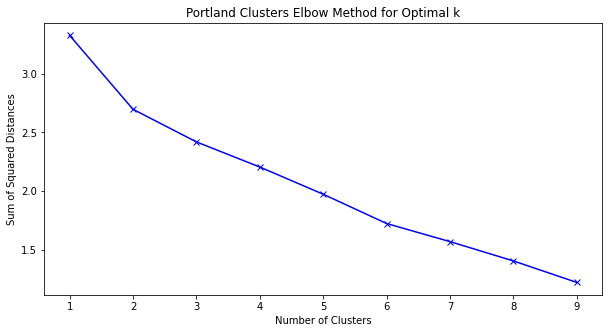

In [69]:
portland_grouped_clustering = portland_grouped.drop('Neighborhood', 1)
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
	km = KMeans(n_clusters = k)
	km = km.fit(portland_grouped_clustering)
	Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Portland Clusters Elbow Method for Optimal k')
plt.show()

In [70]:
kclusters = 6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(portland_grouped_clustering)

#Uncomment next line if you want to run this cell again.
#neighborhoods_venues_sorted =neighborhoods_venues_sorted.drop('Cluster Labels', 1)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
portland_merged = pd_df
portland_merged = portland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

map_clusters = folium.Map(location=[45.5051, -122.6750], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(portland_merged['Latitude'], portland_merged['Longitude'], portland_merged['Name'], portland_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's examine the clusters further.

In [71]:
portland_merged = portland_merged.drop('Has Cafe', 1)
portland_merged = portland_merged.drop('Venue Count', 1)

portland_merged.loc[portland_merged['Cluster Labels'] == 0, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbor Lodge,0,Convenience Store,Bus Stop,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Thai Restaurant,Marijuana Dispensary,NaN,NaN
1,Boise,0,Food Truck,Coffee Shop,Pizza Place,Cocktail Bar,Pet Store,Gift Shop,Grocery Store,Tea Room,Flower Shop,Mexican Restaurant
4,Brooklyn,0,Bar,Light Rail Station,Arts & Crafts Store,Marijuana Dispensary,Park,Soccer Stadium,Pizza Place,Furniture / Home Store,Café,Bus Stop
5,Buckman,0,Coffee Shop,Bar,Brewery,Russian Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Park,Mexican Restaurant,Martial Arts School,Beer Store
7,Downtown,0,Coffee Shop,Hotel,Park,Café,Performing Arts Venue,Pizza Place,Food Truck,Steakhouse,French Restaurant,Cocktail Bar
8,Eliot,0,Brewery,Park,Intersection,Lounge,Bus Stop,Mexican Restaurant,Tapas Restaurant,Bookstore,Gym / Fitness Center,Gym
9,Goose Hollow,0,Vegetarian / Vegan Restaurant,Pub,Pizza Place,Thai Restaurant,Indian Restaurant,Cooking School,Soccer Stadium,Sushi Restaurant,Tunnel,Gym / Fitness Center
11,Hazelwood,0,Pharmacy,Cosmetics Shop,Video Store,Mexican Restaurant,Fast Food Restaurant,Casino,Salon / Barbershop,Pizza Place,Japanese Restaurant,Diner
12,Hillsdale,0,Brewery,Pizza Place,Track,Bakery,Café,Food Truck,Park,Mexican Restaurant,Shipping Store,Grocery Store
13,Hosford-Abernethy,0,Coffee Shop,Bar,Convenience Store,Mexican Restaurant,Pizza Place,Ethiopian Restaurant,Gym / Fitness Center,Breakfast Spot,Brewery,Salon / Barbershop


In [72]:
portland_merged.loc[portland_merged['Cluster Labels'] == 1, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bridlemile,1,Tennis Court,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
portland_merged.loc[portland_merged['Cluster Labels'] == 2, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Cully,2,Marijuana Dispensary,Taco Place,Comedy Club,Mexican Restaurant,Gas Station,Farm,NaN,NaN,NaN,NaN


In [74]:
portland_merged.loc[portland_merged['Cluster Labels'] == 3, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Brentwood-Darlington,3,Deli / Bodega,Bus Stop,Dog Run,Park,NaN,NaN,NaN,NaN,NaN,NaN
23,Portsmouth,3,Grocery Store,Bus Stop,Garden,Campground,Park,NaN,NaN,NaN,NaN,NaN


In [75]:
portland_merged.loc[portland_merged['Cluster Labels'] == 4, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Grant Park,4,Park,Pizza Place,Thai Restaurant,Mobile Phone Shop,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
portland_merged.loc[portland_merged['Cluster Labels'] == 5, portland_merged.columns[[0] + list(range(5, portland_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Parkrose Heights,5,American Restaurant,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most neighborhoods are clustered together in one group with the other groups only containing 1 or 2 neighborhood each. These single grouped neighborhoods contain many 'NaN's, which makes sense as they do not have enough data to be meaningfully grouped. Now to do the same with Sacramento.

In [77]:
sacramento_onehot = pd.get_dummies(sacramento_venues[['Venue Category']], prefix="", prefix_sep="")

sacramento_onehot['Neighborhood'] = sacramento_venues['Neighborhood'] 


fixed_columns = [sacramento_onehot.columns[-1]] + list(sacramento_onehot.columns[:-1])
sacramento_onehot = sacramento_onehot[fixed_columns]

sacramento_onehot.head()

,Neighborhood,ATM,Accessories Store,Alternative Healer,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,...,Thrift / Vintage Store,Trail,Train,Train Station,Travel Agency,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Wings Joint
0,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Avondale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
sacramento_grouped = sacramento_onehot.groupby('Neighborhood').mean().reset_index()
sacramento_grouped

,Neighborhood,ATM,Accessories Store,Alternative Healer,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,...,Thrift / Vintage Store,Trail,Train,Train Station,Travel Agency,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Wings Joint
0,Avondale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.00000,0.000000
1,Ben Ali,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,Boulevard Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00000,0.000000
3,Colonial Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,Curtis Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,Del Paso Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,Downtown,0.027778,0.000000,0.000000,0.055556,0.000000,0.027778,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,East Sacramento,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,Elmhurst,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,Fruitridge Manor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03125,0.03125,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.093750,0.03125,0.000000


In [79]:
def return_most_common_venues(row, num_top_venues):
    my_index = []
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)[0:num_top_venues]
    for index, value in row_categories_sorted.items():
        if(value == 0):
            my_index.append('NaN')
        else:
            my_index.append(index)
    row_categories_sorted = row_categories_sorted.reindex(my_index)
    return row_categories_sorted.index.values

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

sa_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
sa_neighborhoods_venues_sorted['Neighborhood'] = sacramento_grouped['Neighborhood']

for ind in np.arange(portland_grouped.shape[0]):
    sa_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sacramento_grouped.iloc[ind, :], num_top_venues)

sa_neighborhoods_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,Rental Car Location,Cosmetics Shop,Coffee Shop,Hawaiian Restaurant,Breakfast Spot,Middle Eastern Restaurant,Gym,Greek Restaurant,Smoke Shop,Convenience Store
1,Ben Ali,Storage Facility,Train Station,Marijuana Dispensary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boulevard Park,Discount Store,Bakery,Smoke Shop,Chinese Restaurant,Supermarket,Sushi Restaurant,Coffee Shop,Grocery Store,Convenience Store,Bank
3,Colonial Heights,Grocery Store,Ice Cream Shop,Chinese Restaurant,Furniture / Home Store,Mexican Restaurant,New American Restaurant,Gym / Fitness Center,Park,Pizza Place,NaN
4,Curtis Park,Park,Furniture / Home Store,Home Service,Soccer Field,Tennis Court,NaN,NaN,NaN,NaN,NaN
5,Del Paso Heights,Gun Range,Construction & Landscaping,Bookstore,Liquor Store,Nightlife Spot,NaN,NaN,NaN,NaN,NaN
6,Downtown,Café,Gym,Coffee Shop,Farmers Market,Cafeteria,Park,Art Gallery,Plaza,State / Provincial Park,Italian Restaurant
7,East Sacramento,Juice Bar,Pet Store,Thai Restaurant,Dry Cleaner,Sushi Restaurant,Breakfast Spot,English Restaurant,Coffee Shop,Spa,Market
8,Elmhurst,Trail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fruitridge Manor,Fast Food Restaurant,Vietnamese Restaurant,Pizza Place,Breakfast Spot,Chinese Restaurant,New American Restaurant,Furniture / Home Store,Sporting Goods Shop,Grocery Store,Supermarket


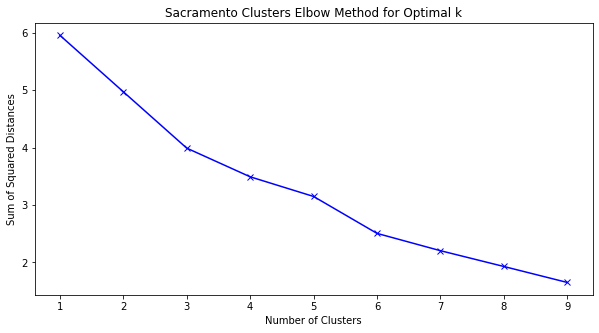

In [82]:
sacramento_grouped_clustering = sacramento_grouped.drop('Neighborhood', 1)
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
	km = KMeans(n_clusters = k)
	km = km.fit(sacramento_grouped_clustering)
	Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Sacramento Clusters Elbow Method for Optimal k')
plt.show()

Again I find usually 6 clusters is where the elbow kink is.

In [83]:
kclusters = 6
#sacramento_grouped_clustering = sacramento_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sacramento_grouped_clustering)

#Uncomment next line if you want to run this cell again. 
#sa_neighborhoods_venues_sorted =sa_neighborhoods_venues_sorted.drop('Cluster Labels', 1)

sa_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sacramento_merged = sa_df
sacramento_merged = sacramento_merged.join(sa_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

map_clusters = folium.Map(location=[38.5816, -121.4944], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sacramento_merged['Latitude'], sacramento_merged['Longitude'], sacramento_merged['Name'], sacramento_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [84]:
sacramento_merged = sacramento_merged.drop("Has Cafe", 1)
sacramento_merged = sacramento_merged.drop("Venue Count", 1)
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 0, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Avondale,0,Rental Car Location,Cosmetics Shop,Coffee Shop,Hawaiian Restaurant,Breakfast Spot,Middle Eastern Restaurant,Gym,Greek Restaurant,Smoke Shop,Convenience Store
2,Boulevard Park,0,Discount Store,Bakery,Smoke Shop,Chinese Restaurant,Supermarket,Sushi Restaurant,Coffee Shop,Grocery Store,Convenience Store,Bank
3,Colonial Heights,0,Grocery Store,Ice Cream Shop,Chinese Restaurant,Furniture / Home Store,Mexican Restaurant,New American Restaurant,Gym / Fitness Center,Park,Pizza Place,NaN
4,Curtis Park,0,Park,Furniture / Home Store,Home Service,Soccer Field,Tennis Court,NaN,NaN,NaN,NaN,NaN
5,Del Paso Heights,0,Gun Range,Construction & Landscaping,Bookstore,Liquor Store,Nightlife Spot,NaN,NaN,NaN,NaN,NaN
6,Downtown,0,Café,Gym,Coffee Shop,Farmers Market,Cafeteria,Park,Art Gallery,Plaza,State / Provincial Park,Italian Restaurant
7,East Sacramento,0,Juice Bar,Pet Store,Thai Restaurant,Dry Cleaner,Sushi Restaurant,Breakfast Spot,English Restaurant,Coffee Shop,Spa,Market
9,Fruitridge Manor,0,Fast Food Restaurant,Vietnamese Restaurant,Pizza Place,Breakfast Spot,Chinese Restaurant,New American Restaurant,Furniture / Home Store,Sporting Goods Shop,Grocery Store,Supermarket
10,Gardenland,0,Mexican Restaurant,Gas Station,Liquor Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Gateway West,0,Playground,Home Service,Park,Gift Shop,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 1, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,River Park,1,Beach,Campground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 2, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Robla,2,Construction & Landscaping,Playground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 3, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Sundance Lake,3,Lake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 4, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Elmhurst,4,Trail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
sacramento_merged.loc[sacramento_merged['Cluster Labels'] == 5, sacramento_merged.columns[[0] + list(range(5, sacramento_merged.shape[1]))]]

,Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ben Ali,5,Storage Facility,Train Station,Marijuana Dispensary,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Sacramento model produced very similar results to the Portland model. 
Now the last thing we will do is to cluster the neighborhoods based on distances into 4 distinct clusters and use box plots to find the inter quartile range, as well as the minimum and maximum venue count for each cluster.

In [90]:
pd_df = pd_df.drop('Has Cafe',1)
pd_df = pd_df.drop('Venue Count',1)

In [91]:
sa_df = sa_df.drop('Has Cafe',1)
sa_df = sa_df.drop('Venue Count',1)

In [92]:
pd_clusters = pd_df.drop('Distance From Downtown (mi)',1)
pd_clusters_names = pd_clusters
pd_clusters = pd_clusters.drop('Population',1)
pd_clusters = pd_clusters.drop('Name',1)

I've already decided to use the number 4 but let's look a the elbow method again, just for fun.

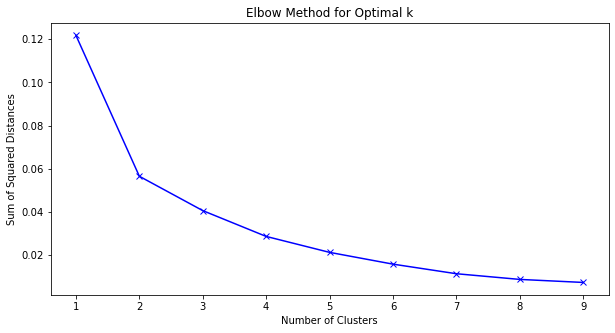

In [93]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
	km = KMeans(n_clusters = k)
	km = km.fit(pd_clusters)
	Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [94]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pd_clusters)

#Uncomment next line if you want to run this cell again.
#pd_clusters_names = pd_clusters_names.drop('Cluster Labels', 1)

pd_clusters_names.insert(0, 'Cluster Labels', kmeans.labels_)

map_clusters = folium.Map(location=[45.5051, -122.6750], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, pop in zip(pd_clusters_names['Latitude'], pd_clusters_names['Longitude'], 
                                  pd_clusters_names['Name'], pd_clusters_names['Cluster Labels'], pd_clusters_names['Population']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Population: '+str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's group the clusters and plot their population distributions with box plots.

In [95]:
pd_cluster_0 = pd_clusters_names.loc[pd_clusters_names['Cluster Labels'] == 0]
pd_cluster_0 = pd_cluster_0.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
pd_cluster_1 = pd_clusters_names.loc[pd_clusters_names['Cluster Labels'] == 1]
pd_cluster_1 = pd_cluster_1.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
pd_cluster_2 = pd_clusters_names.loc[pd_clusters_names['Cluster Labels'] == 2]
pd_cluster_2 = pd_cluster_2.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
pd_cluster_3 = pd_clusters_names.loc[pd_clusters_names['Cluster Labels'] == 3]
pd_cluster_3 = pd_cluster_3.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
pd_clusters_titles = {'East Portland': pd_cluster_0['Population'], 
                      'Center Portland': pd_cluster_1['Population'], 
                      'North Portland': pd_cluster_2['Population'],
                      'West Portland': pd_cluster_3['Population']}
pd_cluster_all = pd.DataFrame(data = pd_clusters_titles)

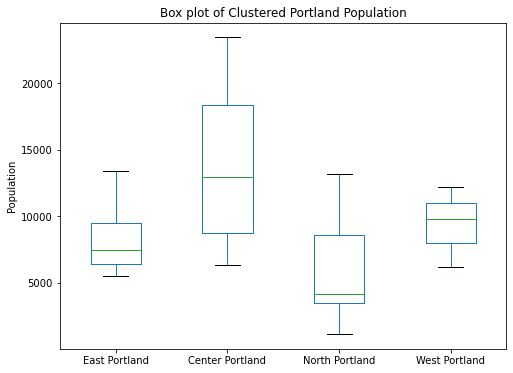

In [96]:
pd_cluster_all.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Clustered Portland Population')
plt.ylabel('Population')

plt.show()

And finally we do the same thing with Sacramento.

In [97]:
sa_clusters = sa_df.drop('Distance From Downtown (mi)',1)
sa_clusters_names = sa_clusters
sa_clusters = sa_clusters.drop('Population',1)
sa_clusters = sa_clusters.drop('Name',1)

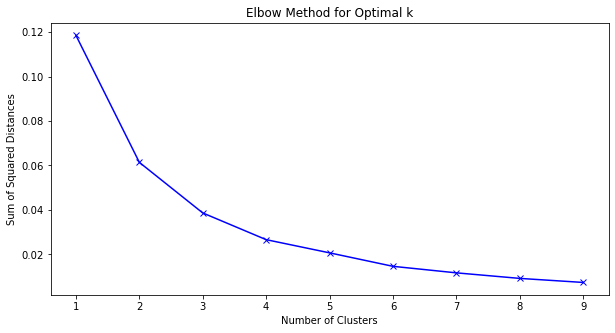

In [98]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
	km = KMeans(n_clusters = k)
	km = km.fit(sa_clusters)
	Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [99]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sa_clusters)

#Uncomment next line if you want to run this cell again.
#sa_clusters_names = sa_clusters_names.drop('Cluster Labels', 1)

sa_clusters_names.insert(0, 'Cluster Labels', kmeans.labels_)

map_clusters = folium.Map(location=[38.5816, -121.4944], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, pop in zip(sa_clusters_names['Latitude'], sa_clusters_names['Longitude'], 
                                  sa_clusters_names['Name'], sa_clusters_names['Cluster Labels'], sa_clusters_names['Population']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Population: ' + str(pop), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [100]:
sa_cluster_0 = sa_clusters_names.loc[sa_clusters_names['Cluster Labels'] == 0]
sa_cluster_0 = sa_cluster_0.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
sa_cluster_1 = sa_clusters_names.loc[sa_clusters_names['Cluster Labels'] == 1]
sa_cluster_1 = sa_cluster_1.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
sa_cluster_2 = sa_clusters_names.loc[sa_clusters_names['Cluster Labels'] == 2]
sa_cluster_2 = sa_cluster_2.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
sa_cluster_3 = sa_clusters_names.loc[sa_clusters_names['Cluster Labels'] == 3]
sa_cluster_3 = sa_cluster_3.drop(['Cluster Labels', 'Latitude', 'Longitude'], 1)
sa_clusters_titles = {'Southeast Sacramento': sa_cluster_0['Population'], 
                      'Southwest Sacramento': sa_cluster_1['Population'], 
                      'Northwest Sacramento': sa_cluster_2['Population'],
                      'Northeast Sacramento': sa_cluster_3['Population']}
sa_cluster_all = pd.DataFrame(data = sa_clusters_titles)

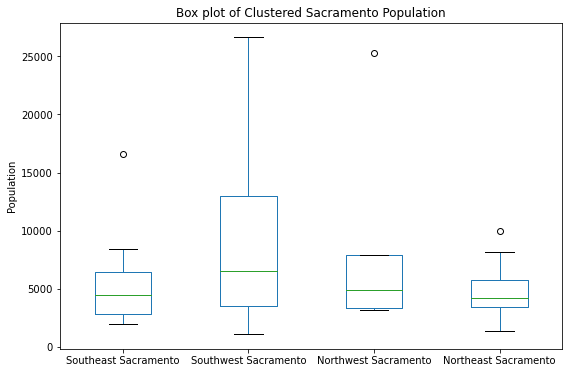

In [101]:
sa_cluster_all.plot(kind='box', figsize=(9, 6))

plt.title('Box plot of Clustered Sacramento Population')
plt.ylabel('Population')

plt.show()

Thank you for looking through this notebook I hope it was easy to follow.